### regression analysis (Weight (INI21002) ~ PDE3B)

In [1]:
library(data.table)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()


In [2]:
data_all <- fread(
    'zcat < ../../../private_data/FigS13-15_regression_data.tsv.gz', 
    header=TRUE,
    data.table=FALSE
)

Read 488370 rows and 53 (of 53) columns from 0.189 GB file in 00:00:04


In [3]:
repo_dir <- normalizePath('../../../')
out_dir <- file.path(repo_dir, 'figs', basename(getwd()))

In [5]:
data <- data_all %>% mutate(
    sex_label = ifelse(sex == 0, 'female', 'male'),
    x = PDE3E,
    y = INI21002
) %>% filter(
    white_british == TRUE &
    sex != -9 &
    age > 0 & 
    x != -9 &
    y != -9    
)

y_lab <- 'Weight [kg]'
x_lab <- expression(paste("rs150090666 (", italic('PDE3B'), ")"))
file_name_head <- 'PDE3B_weight'

data %>% dim() %>% print()

[1] 335701     56


#### the following sni are semi-automated

In [6]:
p <- ggplot(
    data, 
    aes(x = as.factor(x), y = y)) +
geom_boxplot(aes(group = factor(x))) +
stat_summary(
    fun.y=mean, colour="darkred", geom="point", 
    shape=18, size=5, show.legend = FALSE) + 
labs(y = y_lab, x = x_lab) 


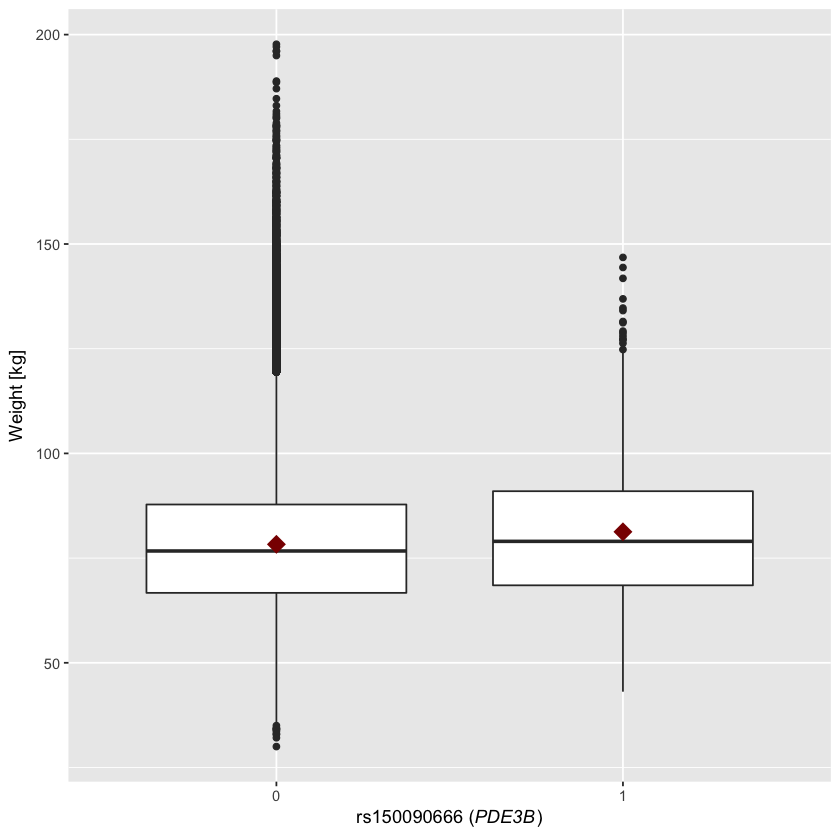

In [7]:
p

Saving 7 x 7 in image


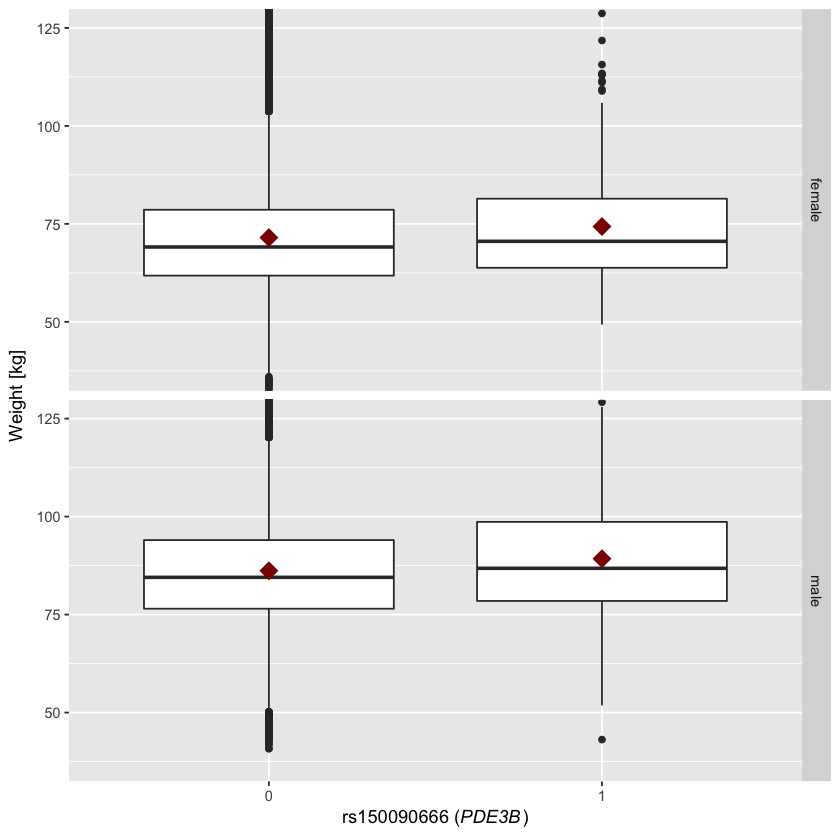

In [8]:
p + 
coord_cartesian(
    ylim = 1.05 * boxplot.stats(data$y)$stats[c(1, 5)]
) + 
facet_grid(sex_label ~ .) + 
ggsave(
    file.path(out_dir, paste0(file_name_head, '.pdf'))
)

Saving 7 x 7 in image


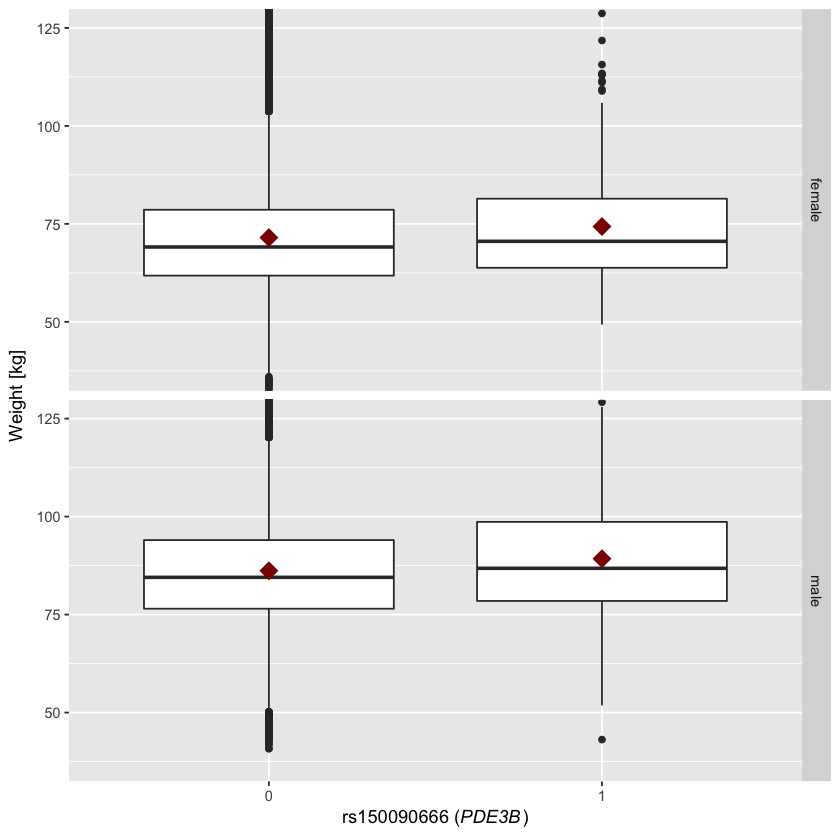

In [9]:
p + 
coord_cartesian(
    ylim = 1.05 * boxplot.stats(data$y)$stats[c(1, 5)]
) + 
facet_grid(sex_label ~ .) + 
ggsave(
    file.path(out_dir, paste0(file_name_head, '_full.pdf'))
)

In [10]:
aggregate(
    y ~ as.factor(x) + as.factor(sex_label), data, mean
) %>% print()

aggregate(
    y ~ as.factor(x) + as.factor(sex_label), data, median
) %>% print()

aggregate(
    y ~ as.factor(x) + as.factor(sex_label), data, length
) %>% print()


  as.factor(x) as.factor(sex_label)        y
1            0               female 71.49436
2            1               female 74.31709
3            0                 male 86.17529
4            1                 male 89.25585
  as.factor(x) as.factor(sex_label)     y
1            0               female 69.10
2            1               female 70.55
3            0                 male 84.50
4            1                 male 86.80
  as.factor(x) as.factor(sex_label)      y
1            0               female 179891
2            1               female    392
3            0                 male 155076
4            1                 male    342


In [11]:
lm_1 <- lm (
    y ~ 0 + age + as.factor(sex) + PC1 + PC2 + PC3 + PC4 + as.factor(x),
    data
)


In [12]:
summary(lm_1)


Call:
lm(formula = y ~ 0 + age + as.factor(sex) + PC1 + PC2 + PC3 + 
    PC4 + as.factor(x), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.051  -9.675  -2.006   7.457 123.536 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
age             -0.075799   0.003034 -24.984  < 2e-16 ***
as.factor(sex)0 76.811498   0.279510 274.807  < 2e-16 ***
as.factor(sex)1 91.528290   0.280854 325.893  < 2e-16 ***
PC1              0.024646   0.015832   1.557    0.120    
PC2             -0.010894   0.016379  -0.665    0.506    
PC3              0.006218   0.015738   0.395    0.693    
PC4              0.007978   0.008679   0.919    0.358    
as.factor(x)1    2.912140   0.519326   5.608 2.05e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.05 on 335693 degrees of freedom
Multiple R-squared:  0.9691,	Adjusted R-squared:  0.9691 
F-statistic: 1.314e+06 on 8 and 335693 DF,  p-value: < 2.2e-16


In [13]:
lm_age2 <- lm (
    y ~ 0 + age + I(age^2) + as.factor(sex) + PC1 + PC2 + PC3 + PC4 + as.factor(x),
    data
)


In [14]:
summary(lm_age2)


Call:
lm(formula = y ~ 0 + age + I(age^2) + as.factor(sex) + PC1 + 
    PC2 + PC3 + PC4 + as.factor(x), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.467  -9.666  -2.008   7.454 124.009 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
age              0.8794174  0.0501593  17.532  < 2e-16 ***
I(age^2)        -0.0074241  0.0003891 -19.079  < 2e-16 ***
as.factor(sex)0 46.5673972  1.6096692  28.930  < 2e-16 ***
as.factor(sex)1 61.3157023  1.6082764  38.125  < 2e-16 ***
PC1              0.0250143  0.0158231   1.581    0.114    
PC2             -0.0112972  0.0163706  -0.690    0.490    
PC3              0.0063346  0.0157298   0.403    0.687    
PC4              0.0090620  0.0086742   1.045    0.296    
as.factor(x)1    2.8986651  0.5190457   5.585 2.34e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.05 on 335692 degrees of freedom
Multiple R-squared:  0.9691,	Adjusted R-squared:  0.969